## Architecture

In [ ]:
import graphviz, IPython

@IPython.core.magic.register_line_cell_magic
def dot(line, cell):
    return graphviz.Source(cell)

### Front End

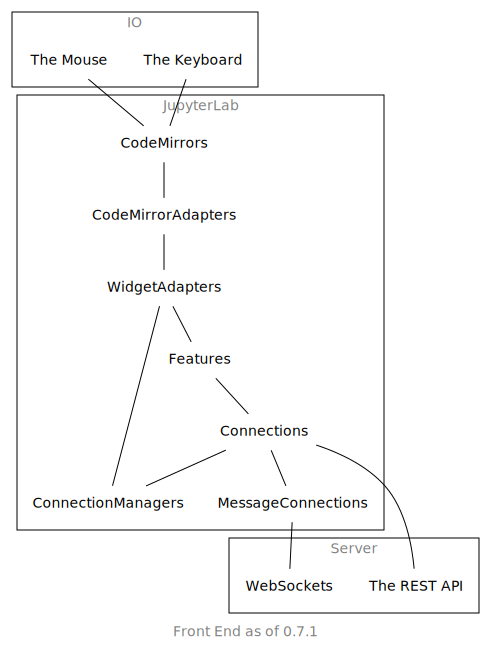

In [89]:
%%dot
graph backend {
    label="Front End as of 0.7.1"
    fontname="sans-serif" fontcolor=grey
    node[shape=none fontname="sans-serif"]
    edge[fontname="sans-serif"]
    subgraph cluster_io { label="IO"
        Keyboard[label="The Keyboard"]
        Mouse[label="The Mouse"]
    }
    subgraph cluster_server { label="Server"
        RestAPI[label="The REST API"]
        WebSockets
    }
    subgraph cluster_lab { label="JupyterLab"
        WebSockets
        ConnectionManagers
        Connections
        MessageConnections
        CodeMirrorAdapters
        WidgetAdapters
        CodeMirrors
        Features
    }
    Connections -- ConnectionManagers
    CodeMirrors -- CodeMirrorAdapters -- WidgetAdapters -- {Features ConnectionManagers}
    Features -- Connections -- RestAPI
    Connections -- MessageConnections -- WebSockets
    {Keyboard Mouse} -- CodeMirrors
}

### Backend

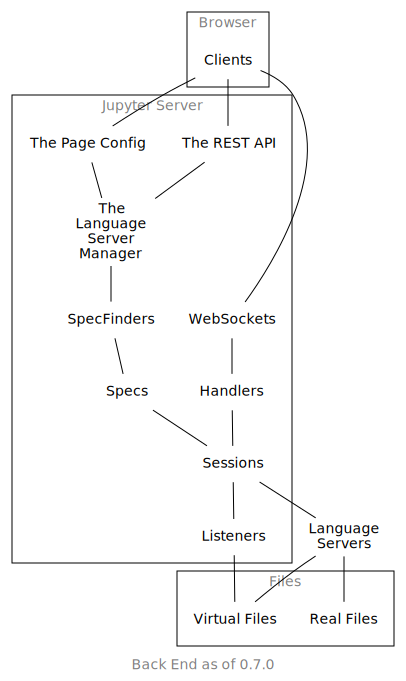

In [88]:
%%dot
graph backend {
    label="Back End as of 0.7.0"
    fontname="sans-serif"
    node[shape=none fontname="sans-serif"]
    edge[fontname="sans-serif"]
    graph[fontcolor=grey]
    subgraph cluster_browser {
        label=Browser
        Clients
    }
    subgraph cluster_notebook { label="Jupyter Server"
        Sessions
        Manager[label="The\nLanguage\nServer\nManager"]
        Handlers
        WebSockets
        SpecFinders
        Specs
        Listeners
        RestAPI[label="The REST API"]
        PageConfig[label="The Page Config"]
    }
    
    subgraph cluster_files { label="Files"
        RealFiles[label="Real Files"] 
        VirtualFiles[label="Virtual Files"]
    }

    LanguageServers[label="Language\nServers"]
    Clients -- {RestAPI PageConfig} -- Manager
    Clients -- WebSockets -- Handlers -- Sessions -- LanguageServers
    Manager -- SpecFinders -- Specs
    Specs -- Sessions
    Sessions -- Listeners -- VirtualFiles
    LanguageServers -- {RealFiles VirtualFiles}
}